# Clustering

<img src="./figures/summaryClustering.png" height="842" width="842">

## Generando datos sinteticos

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Creacion de datos desde 4 gaussianas
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

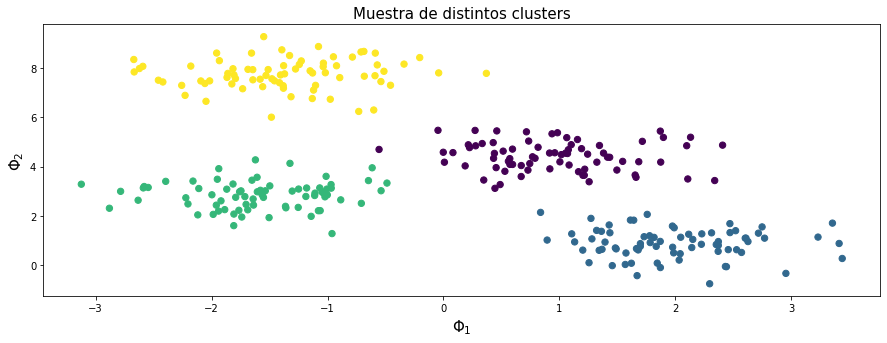

In [5]:
# Plot
plt.figure(figsize=(15,5))
plt.scatter(X[:, 0], X[:, 1], s=40,c=y_true, cmap='viridis')
plt.title('Muestra de distintos clusters', fontsize=15)
plt.xlabel(r'$\Phi_1$', fontsize=15)
plt.ylabel(r'$\Phi_2$', fontsize=15)
plt.show()

### K-means

![https://mubaris.com/posts/kmeans-clustering/](./figures/k4XcapI.gif)

En el algoritmo K-means se asume que **cada cluster** posee una matriz de **covarianza esferica** (isotropica). 
<br>
Entonces **el cluster** mas probable para cada muestra $x_i \in X$ puede ser obtenido encontrando el prototipo mas cercano:
<br><br>
<center>$
z^*_i = argmin_k ||x_i - \mu_k||^2_2
$</center>
<br>
donde $z_i^*$ es el cluster optimo para la muestra $x_i$, el cual minimiza la distancia euclidiana entre $N$ puntos y $K$ centroides.<br><br>

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(X)

In [8]:
labels_kmeans = kmeans.predict(X)

ahora graficamos los centroides de cada cluster (o prototipo)

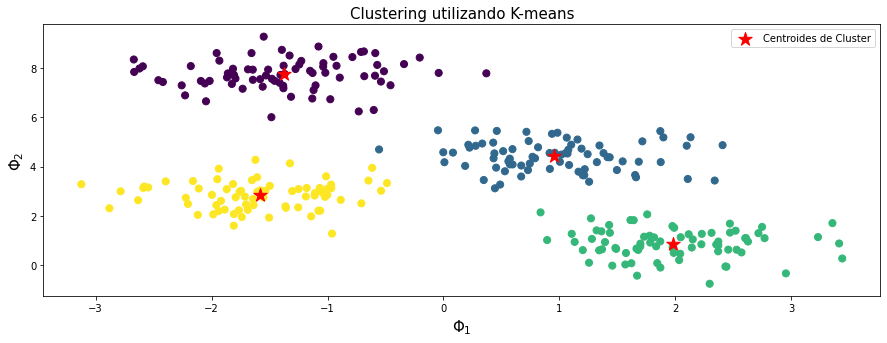

In [9]:
plt.figure(figsize=(15,5)) # Creamos una figura

plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='red', s=200, label='Centroides de Cluster')

plt.title('Clustering utilizando K-means', fontsize=15)
plt.xlabel(r'$\Phi_1$', fontsize=15)
plt.ylabel(r'$\Phi_2$', fontsize=15)
plt.legend()
plt.show()

## Distribucion linealmente no separable?

In [10]:
from sklearn.datasets import make_moons

In [11]:
X_m, y_m = make_moons(200, noise=.05, random_state=0)

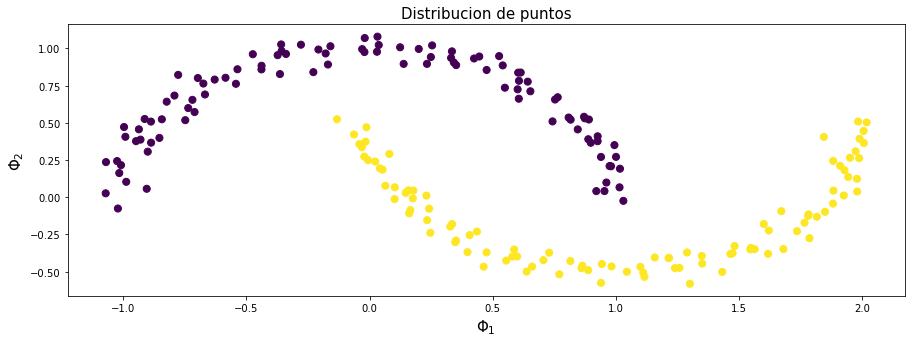

In [12]:
plt.figure(figsize=(15,5)) # Creamos una figura

plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m, s=50, cmap='viridis')

plt.title('Distribucion de puntos', fontsize=15)
plt.xlabel(r'$\Phi_1$', fontsize=15)
plt.ylabel(r'$\Phi_2$', fontsize=15)
plt.show()

## Spectral clustering

K-means asume que cada punto es asignado a un cluster con covarianza esferica. 

A diferencia de K-means, Spectral clustering utiliza una representacion basada en grafos. **Cada punto en el dominio original es un nodo**. Luego **conectamos los puntos por medio de aristas en funcion de algun criterio** de corte (e.g., distancia minima entre ellos)

![](./figures/spectral.png)

Para encontrar los cluster se aplican tecnicas de particion de grafos.

Para conjuntos demasiados grandes la complejidad de este algoritmo aumenta demasiado y la exactitud disminuye significativamente.

In [13]:
from sklearn.cluster import SpectralClustering

In [14]:
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

labels_spectral = spectral.fit_predict(X_m)


/home/cridonoso/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Para comprar realizaremos clustering sobre el mismo conjunto de datos utilizando k-Means

In [15]:
kmeans_2 = KMeans(n_clusters=2)
kmeans_2 = kmeans_2.fit(X_m)
labels_kmeans_2 = kmeans_2.predict(X_m)

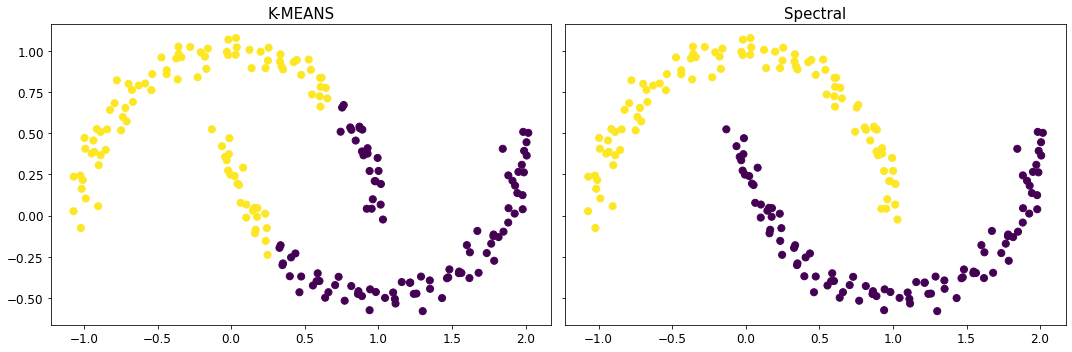

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=True)

axes[0].scatter(X_m[:, 0], X_m[:, 1], c=labels_kmeans_2, s=50, cmap='viridis')
axes[0].set_title('K-MEANS', fontsize=15)
axes[0].tick_params(axis='both', labelsize=12)

axes[1].scatter(X_m[:, 0], X_m[:, 1], c=labels_spectral, s=50, cmap='viridis')
axes[1].set_title('Spectral', fontsize=15)
axes[1].tick_params(axis='both', labelsize=12)


fig.tight_layout()

plt.show()

# Clustering jerarquico

Como se vio en la primera imagen, existen **dos enfoques** para realizar **clustering**: Particional y Jerarquico.

La principal diferencia de las tecnicas **jerarquicas** con las particionales es que los **cluster jerarquicos estan anidados uno dentro de otro**.

Para **crear los clusters** podemos seguir tecnicas **aglomerativas** (desde abajo hacia arriba) o **divisivas** (de arriba hacia abajo)

- **De abajo hacia arriba** combina los grupos similares
- **De arriba hacia abajo** Divide los grupos por algun criterio de particion

### Agglomerative Clustering

**caso base:** cada muestra es un cluster,

El algoritmo inicia con $N$ grupos, donde $N = \text{Cantidad de datos}$

Por cada paso agrupa los elementos mas parecidos.

- La complejidad del clustering aglomerativo es $O(N^3)$. Si se utiliza una cola de prioridades (priority queue) podemos disminuir la complejidad a $O(N^2logN)$ *(Manning et al. 2008)*.<br><br>
- Para $N$ muy grande, una heuristica comun seria **correr primero K-means** y luego **clustering jerarquico sobre los centroides**.<br>

![aas](./figures/hierarch.gif)

[gif source](https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)

## Arboles filogenéticos (Phylogenetic Trees)
(Fuente de datos: [data](https://towardsdatascience.com/molecular-phylogenetics-using-bio-phylo-57ce27492ee9))



Los arboles filogeneticos representan **relaciones evolutivas** entre organismos o genes. 

Las **especies o grupos de interes** se encuentran en las terminaciones de **las ramas**. A su vez, cada **punto de rama** puede dividir el conjunto de muestras, generando otras especies.



Consideremos 5 secuencias etiquetadas de ADN

In [17]:
import pandas as pd

In [20]:
df = pd.read_csv('./data/msa.csv')
df.head()

,type,seq
0,Alpha,AACGTGGCCACAT
1,Beta,AAGGTCGCCACAC
2,Gamma,CAGTTCGCCACAA
3,Delta,GAGATTTCCGCCT
4,Epsilon,GAGATCTCCGCCC


Debemos codificar las variables categoricas 

In [22]:
def transform_input(matrix, dic):
    new_inputs = []
    
    for seq in matrix[:, 1]:
        new_seq = []
        for amin in seq:
            new_seq.append(dic[amin])
            
        new_inputs.append(new_seq)
        
    new_inputs = np.array(new_inputs)
    return new_inputs

In [27]:
df.values

array([['Alpha', 'AACGTGGCCACAT'],
       ['Beta', 'AAGGTCGCCACAC'],
       ['Gamma', 'CAGTTCGCCACAA'],
       ['Delta', 'GAGATTTCCGCCT'],
       ['Epsilon', 'GAGATCTCCGCCC']], dtype=object)

In [28]:
dic_1 = {'A': 0, 'C': 1, 'G':2, 'T':3}

x_1 = transform_input(df.values, dic_1) #label encoding
x_1

array([[0, 0, 1, 2, 3, 2, 2, 1, 1, 0, 1, 0, 3],
       [0, 0, 2, 2, 3, 1, 2, 1, 1, 0, 1, 0, 1],
       [1, 0, 2, 3, 3, 1, 2, 1, 1, 0, 1, 0, 0],
       [2, 0, 2, 0, 3, 3, 3, 1, 1, 2, 1, 1, 3],
       [2, 0, 2, 0, 3, 1, 3, 1, 1, 2, 1, 1, 1]])

Ahora vamos a implementar el arbol utilizando `AgglomerativeClustering`

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [31]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
clusters = hc.fit_predict(x_1)

array([0, 0, 0, 1, 1])

Para graficar el arbol podemos utilizar `dendrogram` y `linkage`. Note que en este caso estamos utilizando `linkage` desde `scipy`. 

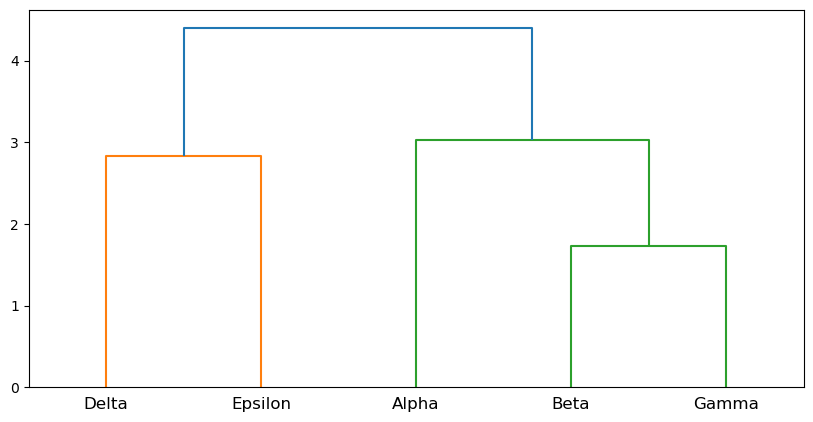

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage


Z = linkage(x_1, metric='euclidean', method='average')

fig, ax = plt.subplots(1,1, dpi=100, figsize=(10,5))

dendrogram(Z, ax=ax, labels=['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon']) 
plt.show()

**Cuanto afecta la codificacion en un algoritmo de clustering aglomerativo?**

Probaremos con otra codificacion. Por ejemplo:

In [41]:
dic_2 = {'A': 1, 'C': 3, 'G':0, 'T':2}
x_2 = transform_input(df.values, dic_2) #label encoding

In [42]:
Z_2 = linkage(x_2, metric='euclidean', method='average')

graficando los dos arboles:

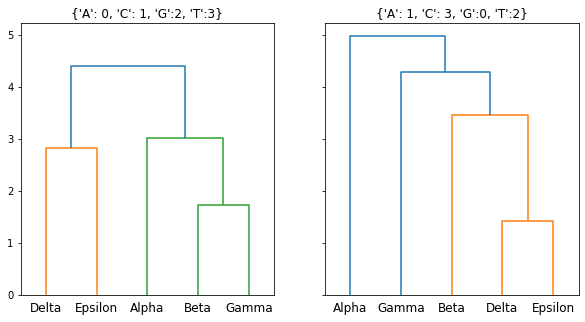

In [43]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(10,5))

dendrogram(Z, labels=['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon'], ax=axes[0]) 
dendrogram(Z_2, labels=['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon'], ax=axes[1]) 

axes[0].set_title("{'A': 0, 'C': 1, 'G':2, 'T':3}")
axes[1].set_title("{'A': 1, 'C': 3, 'G':0, 'T':2}")
plt.show()

Para solucionar este problema podemos utilizar la tecnica de codificacion one_hot encoding

In [61]:
dic_3 = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G':[0, 0, 1, 0], 'T':[0, 0, 0, 1]}
x_3   = transform_input(df.values, dic_3) #onehot encoding

x_3 = np.reshape(x_3, [-1, x_3.shape[1]*x_3.shape[2]])

Para visualizar la invarianza computaremos inmediatamente el `linkage` para otra distribucion de etiquetas:

In [62]:
dic_4 = {'A': [0, 0, 1, 0], 'C': [1, 0, 0, 0], 'G':[0, 1, 0, 0], 'T':[0, 0, 0, 1]}
x_4   = transform_input(df.values, dic_4) #onehot encoding
x_4 = np.reshape(x_4, [-1, x_4.shape[1]*x_4.shape[2]])

In [63]:
Z_3 = linkage(x_3, metric='euclidean', method='average')
Z_4 = linkage(x_4, metric='euclidean', method='average')

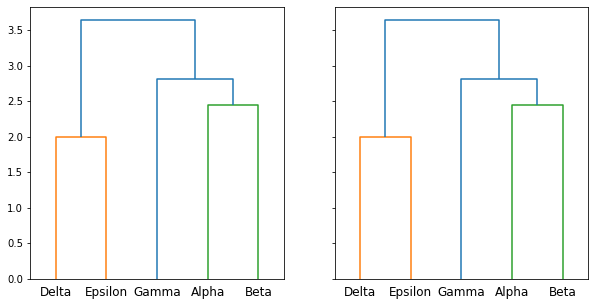

In [64]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(10,5))

dendrogram(Z_3, labels=['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon'], ax=axes[0]) 
dendrogram(Z_4, labels=['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon'], ax=axes[1]) 

plt.show()

## DB-Scan

Clustering basado en la **densidad espacial**

Este algoritmo posee dos hiperparametros:

- Eps ($\epsilon$): Radio maximo de vecindad 
- Numero minimo de puntos (MinPts): Numero minimo de puntos en la $\epsilon\text{-vecindad}$ de cada punto 
<br><br>

**No se necesita definir el numero de clusters**
![as](./figures/DBSCAN_tutorial.gif)
*([Fuente](https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/) de la imagen)*

In [65]:
from sklearn.cluster import DBSCAN

In [67]:
db = DBSCAN(eps=0.3, min_samples=10)
db = db.fit(X_m)

In [69]:
unique_labels = np.unique(db.labels_)

In [72]:
n_clusters_ = len(unique_labels) - (1 if -1 in db.labels_ else 0)
n_clusters_

2

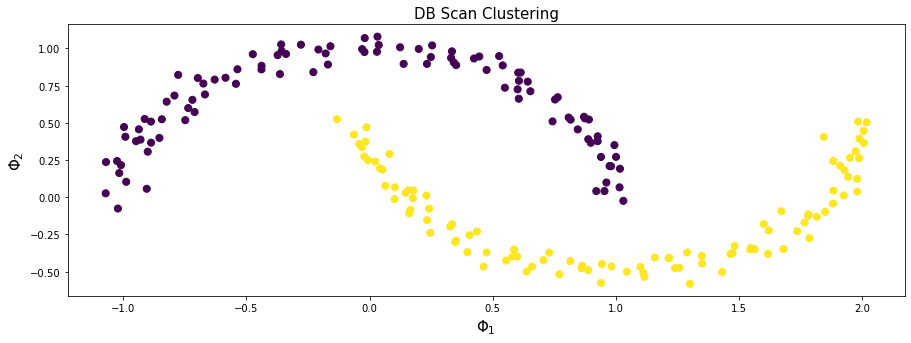

In [73]:
plt.figure(figsize=(15,5)) # Creamos una figura

plt.scatter(X_m[:, 0], X_m[:, 1], c=db.labels_, s=50, cmap='viridis')

plt.title('DB Scan Clustering', fontsize=15)
plt.xlabel(r'$\Phi_1$', fontsize=15)
plt.ylabel(r'$\Phi_2$', fontsize=15)
plt.show()

## Metricas de desempeno

- Un cluster satisface **homogeneidad** si todos sus clusters contienen puntos que pertenecen a solo una clase
- Un cluster satisface **completitud** si todos los puntos que son parte de una clase son elementos de la misma clase
- **V-measure** (medida-V): $v = 2*\left(\frac{\text{homogeneity}\ *\ \text{completeness} }{\text{homogeneity}\ +\  \text{completeness}}\right) $
- **Coeficiente de Silhouette** es calculado utilizando distancia media entre muestras del cluster (a) y entre clusters (b): $\frac{b - a}{\max(a, b)}$

In [147]:
from sklearn import metrics

In [151]:
print('Estimated number of clusters: {}'.format(n_clusters_))

print("Homogeneity: {:.2f}".format(metrics.homogeneity_score(y_m, labels)))

print("Completeness: {:.2f}".format( metrics.completeness_score(y_m, labels)))

print("V-measure: {:.2f}".format(metrics.v_measure_score(y_m, labels)))

print("Silhouette Coefficient: {:.2f}".format(metrics.silhouette_score(X_m, db.labels_)))

Estimated number of clusters: 2
Homogeneity: 1.00
Completeness: 1.00
V-measure: 1.00
Silhouette Coefficient: 0.33
